0.4377169864
0.4118602405
0.436650737
0.436650737
0.01856639266
0
0
0.2330214089
0.03530627408
0.09885756742
0
0.09885756742
0
0.1977151348
0.1977151348
0.1977151348
0.4448590534
0.4448590534
0.4448590534
0.4448590534
0.06355129334
0.06355129334
0.06355129334
0.06355129334
[43.77169864 41.18602405 43.6650737  43.6650737 ]


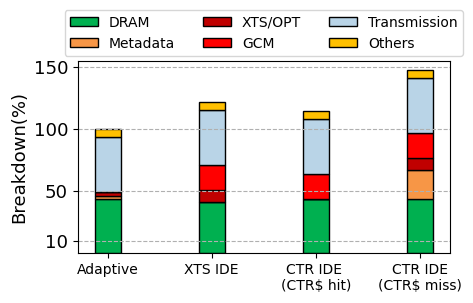

In [14]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl



xlabels=['Adaptive','XTS IDE',"CTR IDE \n(CTR$ hit)","CTR IDE\n(CTR$ miss)"]
ylabels='Breakdown(%)'

n = len(xlabels)    # number of test systems
x = np.arange(n) 

wb = openpyxl.load_workbook(filename="breakdown.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value * 100)     
        print(value)            
b1=b1.reshape(6, 4)
print(b1[0])
     
width=0.25
stack_labels = ['DRAM', 'Metadata',"XTS/OPT",'GCM','Transmission','Others',]
colors = ['#00B050', '#F79646', '#C00000', '#FF0000', '#B9D4E7', '#FFC000']

allfigsize=(4.8,2.5)  
plt.figure(figsize=allfigsize)
bottom = np.zeros(n)
# m = len(stack_labels)
m = 6
for i in range(m):
    plt.bar(x, b1[i], width, bottom=bottom,label=stack_labels[i], color=colors[i], edgecolor='black', linewidth=1)    
    bottom += b1[i]

plt.grid(axis='y',linestyle='--')
plt.xticks(x,xlabels, fontsize=10, rotation=0,ha='center', va='top')  
plt.yticks([10,50,100,150],fontsize=13)
plt.ylabel(ylabels,fontsize=13)    
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.30), fontsize=10)    
plt.savefig('breakdown.pdf',bbox_inches = 'tight')    
# plt.show(0)